<a href="https://colab.research.google.com/github/asmakhoualdia98/Wheat-Head-Disease-Detection/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install imutils

In [ ]:
#Task is to detect various wheat diseases using various Deep Learning Models like VGG16, VGG19
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Input
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from keras.applications import ResNet50
from keras.applications import VGG16
from keras.applications import VGG19
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pickle
from keras.models import Model

In [ ]:
# Define the path to your dataset directory
dataset = "C:/Users/Asma/Downloads/Wheat Disease Dataset"
label = "lb.pickle"

LABELS = set(["Fusarium Head Blight", "Healthy Wheat", "Leaf Rust", "Tan Spot"])

In [ ]:
imagePaths = list(paths.list_images(dataset))
#Data and Label Preparation:
data = []
labels = []
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    if label not in LABELS:
        continue
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(label)

In [ ]:
#Convert to NumPy Arrays:
data = np.array(data)
labels = np.array(labels)
#Label Binarization:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#Train-Test Split:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
                                                  test_size=0.25, stratify=labels, random_state=42)

In [ ]:
#sets up data augmentation for the training and validation images using the ImageDataGenerator class from Keras
trainAug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")
valAug = ImageDataGenerator()

In [ ]:
#VGG19 Base Model Initialization:
headmodel = VGG19(weights="imagenet", include_top=False,
                  input_tensor=Input(shape=(224, 224, 3)))
#Model Definition:
model = headmodel.output
#Average Pooling Layer:
model = AveragePooling2D(pool_size=(5, 5))(model)
#Flattening Layer:
model = Flatten(name="flatten")(model)
#Dense (Fully Connected) Layer:
model = Dense(512, activation="relu")(model)
#Dropout Layer:
model = Dropout(0.4)(model)
#Output Layer:
model = Dense(len(lb.classes_), activation="softmax")(model)

In [ ]:
moodel = Model(inputs=headmodel.input, outputs=model)
for layer in headmodel.layers:
    layer.trainable = False
    #Optimizer Initialization:
opt = Adam(lr=1e-3)
moodel.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
# Define batch size
batch_size = 32

# Fit the model
history = moodel.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=batch_size),
    steps_per_epoch=len(trainX) // batch_size,
    validation_data=valAug.flow(testX, testY),
    validation_steps=len(testX) // batch_size,
    epochs=20)

C:\Users\Asma\AppData\Local\Temp\ipykernel_2204\966050046.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = moodel.fit_generator(


Epoch 1/20
21/21 [==============================] - 399s 19s/step - loss: 0.4427 - accuracy: 0.9006 - val_loss: 0.7506 - val_accuracy: 0.8393
Epoch 2/20
21/21 [==============================] - 316s 15s/step - loss: 0.4087 - accuracy: 0.8870 - val_loss: 0.8676 - val_accuracy: 0.8348
Epoch 3/20
21/21 [==============================] - 310s 15s/step - loss: 0.3885 - accuracy: 0.8976 - val_loss: 0.6493 - val_accuracy: 0.8795
Epoch 4/20
21/21 [==============================] - 307s 15s/step - loss: 0.3052 - accuracy: 0.8946 - val_loss: 0.6653 - val_accuracy: 0.8795
Epoch 5/20
21/21 [==============================] - 310s 15s/step - loss: 0.2668 - accuracy: 0.9196 - val_loss: 0.5590 - val_accuracy: 0.8884
Epoch 6/20
21/21 [==============================] - 307s 15s/step - loss: 0.2633 - accuracy: 0.9111 - val_loss: 0.6508 - val_accuracy: 0.8884
Epoch 7/20
21/21 [==============================] - 306s 15s/step - loss: 0.2117 - accuracy: 0.9247 - val_loss: 0.6211 - val_accuracy: 0.8705
Epoch 

In [ ]:
#Model Prediction:
predictions = moodel.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=lb.classes_))

8/8 [==============================] - 96s 12s/step
                      precision    recall  f1-score   support

Fusarium Head Blight       0.96      0.84      0.89        80
       Healthy Wheat       0.84      0.94      0.89        86
           Leaf Rust       0.90      0.90      0.90        67

            accuracy                           0.89       233
           macro avg       0.90      0.89      0.89       233
        weighted avg       0.90      0.89      0.89       233



In [ ]:
print(history.history)



{'loss': [0.44274580478668213, 0.40870845317840576, 0.38845834136009216, 0.30523043870925903, 0.26683297753334045, 0.2633453607559204, 0.21169333159923553, 0.17804886400699615, 0.15679289400577545, 0.20696906745433807, 0.16631565988063812, 0.13685154914855957, 0.15149348974227905, 0.20393134653568268, 0.13949210941791534, 0.14183534681797028, 0.13363850116729736, 0.1494167298078537, 0.11039305478334427, 0.12191234529018402], 'accuracy': [0.900602400302887, 0.8870481848716736, 0.8975903391838074, 0.8945783376693726, 0.9196428656578064, 0.9111445546150208, 0.9246987700462341, 0.9518072009086609, 0.9367470145225525, 0.9337349534034729, 0.9397590160369873, 0.9518072009086609, 0.9487951993942261, 0.9367470145225525, 0.9442771077156067, 0.9503012299537659, 0.9503012299537659, 0.9487951993942261, 0.9533132314682007, 0.9623494148254395], 'val_loss': [0.7506341934204102, 0.8675742745399475, 0.6493340730667114, 0.6653054356575012, 0.5590265393257141, 0.6507534384727478, 0.6210959553718567, 0.684

In [ ]:
print(len(history.history['accuracy']))
print(len(history.history['val_accuracy']))


20
20


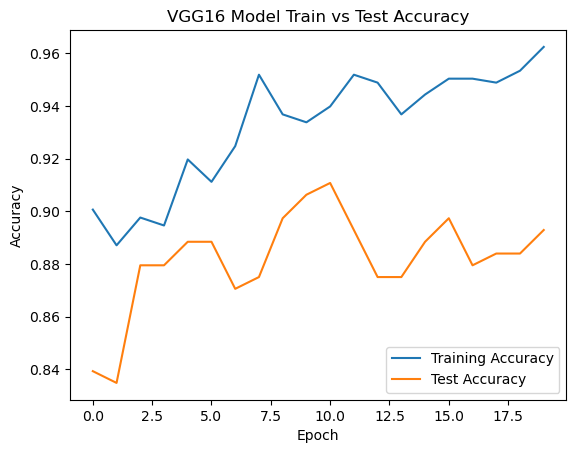

In [ ]:
N = len(history.history['accuracy'])

plt.plot(np.arange(0, N), history.history['accuracy'], label="Training Accuracy")
plt.plot(np.arange(0, N), history.history['val_accuracy'], label="Test Accuracy")
plt.title('VGG16 Model Train vs Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
moodel.save("model.h5")
f = open("label", "wb")
f.write(pickle.dumps(lb))
f.close()

C:\Users\Asma\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


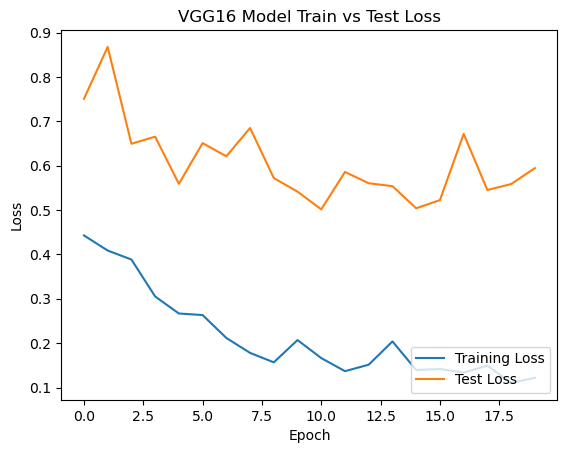

In [ ]:
N = len(history.history['loss'])

plt.plot(np.arange(0, N), history.history['loss'], label="Training Loss")
plt.plot(np.arange(0, N), history.history['val_loss'], label="Test Loss")
plt.title('VGG16 Model Train vs Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()